In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('hiber_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:3]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('hiber_test.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:3]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1
 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 2 2 2
 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2]
[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 69  0]
 [37 60  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 60  0]
 [38 62  3]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [40 58  2]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0

In [2]:
from sklearn import tree
rel_max_depth = 0
rel_min_samples_leaf = 0
rel_pre = -1

for max_depth in range(train_features.shape[1],2, -1):
    for min_samples_leaf in range(1,int(306 * 0.1),2):
        clf = tree.DecisionTreeClassifier(max_depth = max_depth,min_samples_leaf =min_samples_leaf)
        clf = clf.fit(train_features, train_labels)

        pre = clf.predict(test_features)
        accuracy = np.sum(pre == test_labels) / pre.shape[0]
        print('max_depth =',max_depth,',min_samples_leaf =', min_samples_leaf,'accuracy=', accuracy)
        if accuracy >= rel_pre:
            rel_pre = accuracy
            rel_max_depth =max_depth
            rel_min_samples_leaf = min_samples_leaf
            

max_depth = 3 ,min_samples_leaf = 1 accuracy= 0.7704918032786885
max_depth = 3 ,min_samples_leaf = 3 accuracy= 0.7049180327868853
max_depth = 3 ,min_samples_leaf = 5 accuracy= 0.7049180327868853
max_depth = 3 ,min_samples_leaf = 7 accuracy= 0.7049180327868853
max_depth = 3 ,min_samples_leaf = 9 accuracy= 0.7377049180327869
max_depth = 3 ,min_samples_leaf = 11 accuracy= 0.6885245901639344
max_depth = 3 ,min_samples_leaf = 13 accuracy= 0.6885245901639344
max_depth = 3 ,min_samples_leaf = 15 accuracy= 0.7540983606557377
max_depth = 3 ,min_samples_leaf = 17 accuracy= 0.8032786885245902
max_depth = 3 ,min_samples_leaf = 19 accuracy= 0.8032786885245902
max_depth = 3 ,min_samples_leaf = 21 accuracy= 0.7704918032786885
max_depth = 3 ,min_samples_leaf = 23 accuracy= 0.7704918032786885
max_depth = 3 ,min_samples_leaf = 25 accuracy= 0.7704918032786885
max_depth = 3 ,min_samples_leaf = 27 accuracy= 0.7704918032786885
max_depth = 3 ,min_samples_leaf = 29 accuracy= 0.7704918032786885


In [3]:
print('rel_pre：',rel_pre)
print('rel_max_depth：',rel_max_depth)
print('rel_min_samples_leaf：',rel_min_samples_leaf)

rel_pre： 0.8032786885245902
rel_max_depth： 3
rel_min_samples_leaf： 19


**********************Result**********************
Training time cost 0.0010058879852294922 s
Test time cost 0.0 s
max_depth= 3 min_samples_leaf= 19 accuracy= 0.8032786885245902


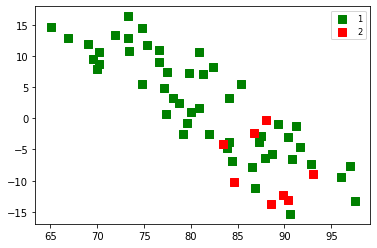

In [5]:
import matplotlib.pyplot as plt
import time
from sklearn import  decomposition
def plotBestFit(data0,data1):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')


    
    #plt.xlabel('x1'); plt.ylabel('x2');
    # ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
    # ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
    # ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
    # ax.scatter(axis_x1, axis_y1,axis_z1,  c='red', marker='s')
    # ax.scatter(axis_x2, axis_y2, axis_z2, c='blue')
    plt.legend(fontsize='small',labels=[ '1','2'])  
    plt.savefig("tree-matplotlib.png")
    plt.show()

print('**********************Result**********************')
time_start = time.time()
# 创建分类器对象
clf = tree.DecisionTreeClassifier(max_depth = rel_max_depth,min_samples_leaf =rel_min_samples_leaf)

#用训练数据拟合分类器模型
clf = clf.fit(train_features, train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')
time_start = time.time()

#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features)
time_end = time.time()
print('Test time cost',time_end-time_start,'s')
accuracy = np.sum(label_predict == test_labels) / pre.shape[0]
#print(pre)
print('max_depth=',rel_max_depth,'min_samples_leaf=', rel_min_samples_leaf,'accuracy=',np.sum(label_predict == test_labels) / label_predict.shape[0])

#得到的决策树的结构序列为
feature_names = ['operaAge','operaTime','nodes']

class_names = ['1','2']
dot_data = tree.export_graphviz(clf, out_file='tree-segment-graphviz.dot',feature_names =feature_names,class_names=class_names
,filled = True, rounded = True,special_characters = True)

#n_components是降维后的主成成分数量
pca = decomposition.TruncatedSVD(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 1],X_pca[label_predict == 2])

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 2]
Correct_no: 49
Accuracy: 0.8032786885245902
F1_score： 0.8032786885245902
precision： 0.8032786885245902
recall： 0.8032786885245902


In [4]:
print('模型中各属性的重要程度：',clf.feature_importances_)
print(len(clf.feature_importances_))

模型中各属性的重要程度： [0.02607012 0.0775018  0.89642808]
3


In [8]:
name_list = []
num_list = []
for i in range(0,3):
    if(clf.feature_importances_[i]>0):
        name_list.append(i)
        num_list.append(round(clf.feature_importances_[i]*100, 2))
#         num_list.append(clf.feature_importances_[i])
print(name_list)
print(num_list)

[0, 1, 2]
[2.61, 7.75, 89.64]


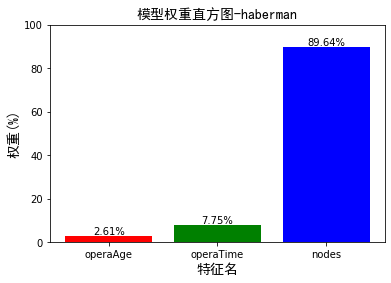

In [9]:
name_list = ['operaAge','operaTime','nodes']
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=14)  
rects=plt.bar(range(len(num_list)), num_list, color='rgbyg')
# X轴标题
index=[0,1,2]

plt.ylim(ymax=100, ymin=0)
plt.xticks(index, name_list)
plt.ylabel(u'权重(%)',FontProperties=font) #Y轴标签
plt.xlabel(u'特征名',FontProperties=font) #X轴标签
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height)+'%', ha='center', va='bottom')
plt.title(u'模型权重直方图-haberman', FontProperties=font)
plt.savefig("模型权重直方图-haberman-决策树.png")
plt.show()

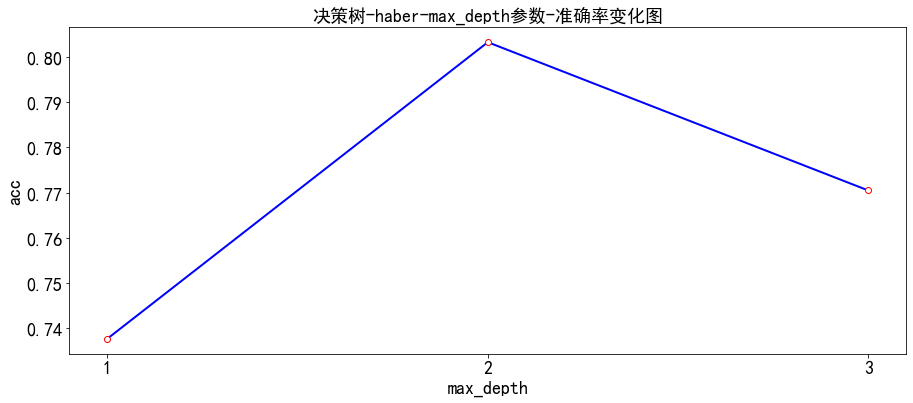

In [20]:
from sklearn import tree
rel_max_depth = 0
rel_min_samples_leaf = 0
rel_pre = -1
x = []
y = []
for max_depth in range(train_features.shape[1],0, -1):
    x.append(max_depth)
    clf = tree.DecisionTreeClassifier(max_depth = max_depth)
    clf = clf.fit(train_features, train_labels)
    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    y.append(accuracy)
#     print('max_depth =',max_depth,',min_samples_leaf =1','accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_max_depth =max_depth
        rel_min_samples_leaf = min_samples_leaf
            

# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",marker='o', mec='r', mfc='w',linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xticks(x, x,size=18)
plt.yticks(size=18)
plt.xlabel("max_depth",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("决策树-haber-max_depth参数-准确率变化图",size=18) #图标题
# 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    
plt.savefig("决策树-haber-max_depth参数选择图.png") #保存图
plt.show()  #显示图

max_depth = None ,min_samples_leaf = 1 accuracy= 0.7377049180327869
max_depth = None ,min_samples_leaf = 3 accuracy= 0.7540983606557377
max_depth = None ,min_samples_leaf = 5 accuracy= 0.7049180327868853
max_depth = None ,min_samples_leaf = 7 accuracy= 0.7704918032786885
max_depth = None ,min_samples_leaf = 9 accuracy= 0.6229508196721312
max_depth = None ,min_samples_leaf = 11 accuracy= 0.6885245901639344
max_depth = None ,min_samples_leaf = 13 accuracy= 0.6885245901639344
max_depth = None ,min_samples_leaf = 15 accuracy= 0.7540983606557377
max_depth = None ,min_samples_leaf = 17 accuracy= 0.8032786885245902
max_depth = None ,min_samples_leaf = 19 accuracy= 0.8032786885245902
max_depth = None ,min_samples_leaf = 21 accuracy= 0.7704918032786885
max_depth = None ,min_samples_leaf = 23 accuracy= 0.7704918032786885
max_depth = None ,min_samples_leaf = 25 accuracy= 0.7704918032786885
max_depth = None ,min_samples_leaf = 27 accuracy= 0.7704918032786885
max_depth = None ,min_samples_leaf = 29

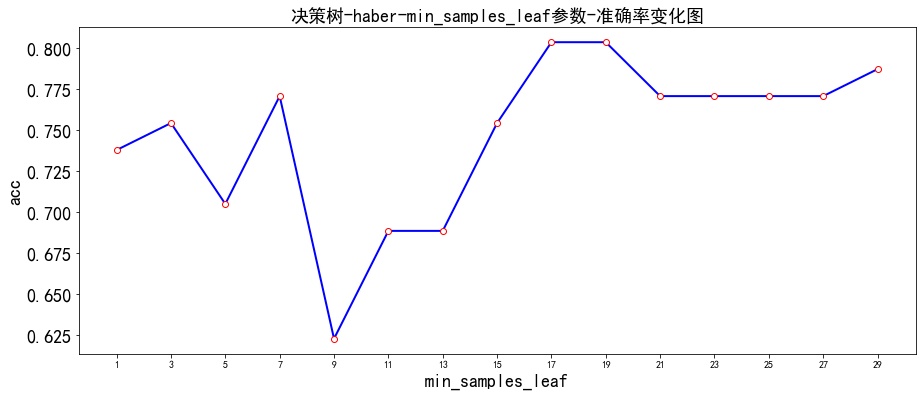

In [6]:
from sklearn import tree
rel_max_depth = 0
rel_min_samples_leaf = 0
rel_pre = -1
x = []
y = []

for min_samples_leaf in range(1,int(306 * 0.1),2):
    clf = tree.DecisionTreeClassifier(max_depth = None,min_samples_leaf =min_samples_leaf)
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    x.append(min_samples_leaf)
    y.append(accuracy)
    print('max_depth = None',',min_samples_leaf =', min_samples_leaf,'accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_min_samples_leaf = min_samples_leaf
            

# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",marker='o', mec='r', mfc='w',linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("min_samples_leaf",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("决策树-haber-min_samples_leaf参数-准确率变化图",size=18) #图标题
# 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
    
plt.savefig("决策树-haber-min_samples_leaf参数选择图.png") #保存图
plt.show()  #显示图